# Load dataset

**record name , balanced sample**
- record 04015 -> 4000
- record 04043 -> 1000
- record 04048 -> 900
- record 04908 -> tidak bisa di split karena hanya AF
- record 04936 -> 2000
- record 05091 -> 1000, class 0 29
- record 05121 -> 1000, class 0, 150
- record 05261 -> 1000, class 0 105
- record 06426 -> 2000
- record 06453 -> 300
- record 06995 -> 900
- record 07910 -> 320
- record 08215 -> 400

In [ ]:
record = "04015"
n_samples = 400

In [2]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
    if filename.find('sequence') > -1 :
        filenames.append(filename)

In [3]:
filenames

['AFDB_04015_sequence_300_pt.csv',
 'AFDB_04043_sequence_300_pt.csv',
 'AFDB_04048_sequence_300_pt.csv',
 'AFDB_04126_sequence_300_pt.csv',
 'AFDB_04908_sequence_300_pt.csv',
 'AFDB_04936_sequence_300_pt.csv',
 'AFDB_05091_sequence_300_pt.csv',
 'AFDB_05121_sequence_300_pt.csv',
 'AFDB_05261_sequence_300_pt.csv',
 'AFDB_06426_sequence_300_pt.csv',
 'AFDB_06453_sequence_300_pt.csv',
 'AFDB_06995_sequence_300_pt.csv',
 'AFDB_07910_sequence_300_pt.csv',
 'AFDB_08215_sequence_300_pt.csv']

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

- Split Dataset

In [5]:
ecg_df = pd.read_csv(dataset_folder + 'AFDB_%s_sequence_300_pt.csv' % record, header=None)

In [6]:
ecg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.837998,0.442961,-0.049934,-0.340601,-0.404066,0.072298,0.218148,0.311134,0.328779,0.336140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.636554,0.163268,-0.267737,-0.208798,-0.062597,0.043323,0.096475,0.124389,0.142090,0.159600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.968192,0.732305,0.271025,-0.150575,-0.317443,-0.204595,-0.057135,0.067434,0.144128,0.167972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.785806,0.319584,-0.137108,-0.354224,-0.386825,-0.092358,0.054004,0.169850,0.237713,0.275138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.675929,0.257608,-0.466084,-0.109584,-0.005967,0.059874,0.095458,0.118309,0.133442,0.155879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


In [7]:
X = ecg_df.iloc[:,:300].values
y = ecg_df.iloc[:,300].values

print(y)
le = LabelEncoder()
le.fit(y)

labels = le.classes_
print(" categorical label : ", labels)

y = le.transform(y)
print(y)

['N' 'N' 'N' ... 'AF' 'AF' 'AF']
 categorical label :  ['AF' 'N']
[1 1 1 ... 0 0 0]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

In [9]:
train_df = pd.DataFrame(np.hstack((X_train, np.expand_dims(y_train, 1))))
test_df = pd.DataFrame(np.hstack((X_test, np.expand_dims(y_test, 1))))

- 1 sequence terdiri dari 300 titik data , kolom terakhir merupakan label untuk tiap sequence

In [10]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.866196,0.458539,-0.053484,-0.030617,-0.017928,0.011495,0.040826,0.019593,0.052095,0.054213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.838793,0.594240,-0.001390,-0.245688,-0.020477,0.120405,0.197224,0.237000,0.239735,0.232448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.225900,0.363714,0.588477,0.816516,0.863081,0.201842,-0.383011,-0.260647,-0.065412,0.080731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.851872,0.373015,-0.277078,-0.357510,-0.126459,0.047289,0.143643,0.199506,0.228312,0.250200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.243932,0.330563,0.493020,0.731287,0.644065,0.022791,-0.257318,-0.101495,-0.005816,0.067648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [11]:
#print dataset distribution

train_df[300]=train_df[300].astype(int)
equilibre=train_df[300].value_counts()

print(equilibre)

1    4996
0     299
Name: 300, dtype: int64


- Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

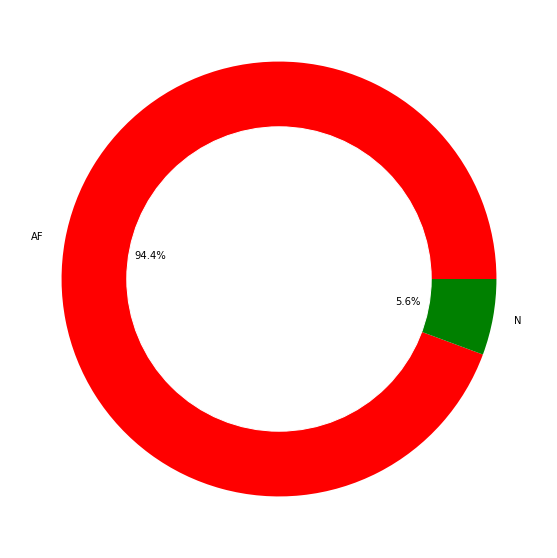

In [12]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=labels, 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [13]:
# sampling and resampling dataset

from sklearn.utils import resample
 
random_states = [42, 123]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[300]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
1914,0.706665,0.441993,-0.335136,-0.354199,0.083231,0.161181,0.194547,0.227699,0.234053,0.238023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4889,0.804495,0.603068,0.117173,-0.311544,-0.392230,-0.256519,-0.075259,0.047684,0.130819,0.190345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1945,0.839429,0.463075,-0.004308,-0.284664,-0.331693,-0.246960,-0.149652,-0.013256,0.107088,0.202592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1302,0.670036,0.339502,-0.095013,-0.363863,-0.241190,-0.081987,0.030779,0.092521,0.130923,0.159838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3281,0.831013,0.682709,0.348238,-0.024871,-0.256011,-0.294346,-0.254415,-0.171844,-0.046613,0.060245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Sekarang kita memiliki dataset yang sudah balance.

In [15]:
# cek balanced dataset

equilibre=train_df[300].value_counts()

print(equilibre)

1    400
0    400
Name: 300, dtype: int64


## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [16]:
ECG_PER_CLASS =train_df.groupby(300,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [17]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
2564,0.752842,0.464026,-0.134382,-0.122611,0.028369,0.113108,0.163215,0.210299,0.194305,0.178449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1085,0.313048,0.524751,0.739499,0.728966,0.095934,-0.315195,-0.151040,0.000431,0.057918,0.096500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [18]:
def plot_1_sample(class_number, fs=250):
    data = ECG_PER_CLASS.iloc[class_number,:300]
    times = np.arange(data.shape[0], dtype='float') / fs * 1000
    
    plt.plot(times, data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [19]:
def plot_hist(class_number, min_, size, fs=250):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[300]==class_number].values
    
    # scale tm value (*1000) agar bisa ditampilkan dalam satuam (ms)
    tm = np.arange(ECG.shape[1], dtype='float') / fs * 1000
    
    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    times = np.tile(tm[min_:size], ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(times, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

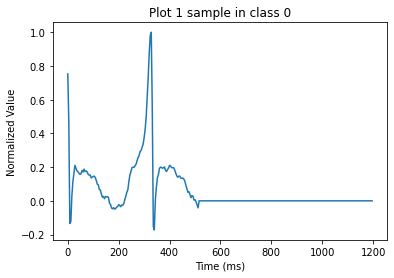

In [20]:
plot_1_sample(class_number=0)

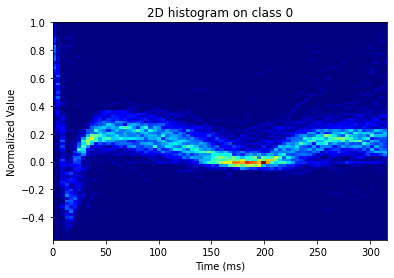

In [21]:
plot_hist(class_number=0, min_=0, size=80)

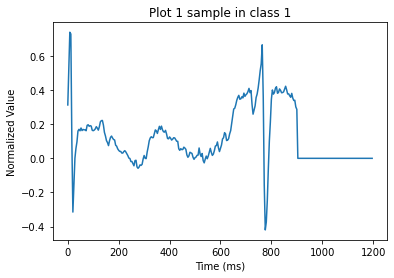

In [22]:
plot_1_sample(class_number=1)

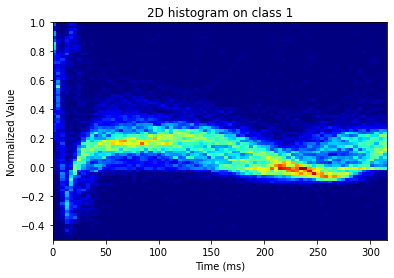

In [23]:
plot_hist(class_number=1, min_=0, size=80)

### Save Balanced Training Data and Test Data

In [24]:
train_df.to_csv(dataset_folder + "train_AFDB_%s_balanced.csv" % record, header=None, index=None)
test_df.to_csv(dataset_folder + "test_AFDB_%s.csv" % record, header=None, index=None)